In [1]:
import structuralcodes.sections._geometry as geo
from structuralcodes.materials.concrete import ConcreteMC2010
from shapely import Polygon
from structuralcodes.materials.constitutive_laws import ElasticPlastic

mat1 = ConcreteMC2010(30)
mat2 = ConcreteMC2010(30)
matR = ElasticPlastic(210000, fy=391.3, Eh=2100, eps_su = 0.04)

In [2]:
rec1 = Polygon(((-50,0),(50,0),(50,300),(-50,300)))
rec2 = Polygon(((-200,300),(200,300),(200,350),(-200,350)))
geom1 = geo.SurfaceGeometry(rec1, mat1)
geom2 = geo.SurfaceGeometry(rec2, mat2)


geomC = geom1 + geom2
# geomC = geo.CompoundGeometry([geom1,geom2])

<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="300" height="300" viewBox="-216.0 -16.0 432.0 382.0" preserveAspectRatio="xMinYMin meet"><g transform="matrix(1,0,0,-1,0,350.0)"><g><path fill-rule="evenodd" fill="#ff3333" stroke="#555555" stroke-width="2.88" opacity="0.6" d="M -50.0,0.0 L 50.0,0.0 L 50.0,300.0 L -50.0,300.0 L -50.0,0.0 z" /><path fill-rule="evenodd" fill="#ff3333" stroke="#555555" stroke-width="2.88" opacity="0.6" d="M -200.0,300.0 L 200.0,300.0 L 200.0,350.0 L -200.0,350.0 L -200.0,300.0 z" /></g></g></svg>


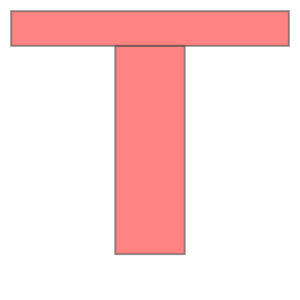

In [3]:
print(geomC._repr_svg_())
geomC

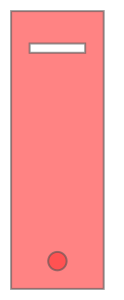

In [4]:
rec = Polygon(((-50,0),(50,0),(50,300),(-50,300)))
# rec = Polygon(((-50,0),(50,0),(50,300),(-50,300)),[[(-30,50),(-30,280),(30,280),(30,50)]]) # WITH HOLE
rec = Polygon(((-50,0),(50,0),(50,300),(-50,300)),[[(-30,255),(-30,265),(30,265),(30,255)]]) # WITH SMALL HOLE
geom = geo.SurfaceGeometry(rec, mat1)
geomRC = geo.add_reinforcement(geom,(0,30),19.88,matR)
geomRC

In [5]:
geomRC.geometries[0].polygon.exterior.coords[:-1]

[(-50.0, 0.0), (50.0, 0.0), (50.0, 300.0), (-50.0, 300.0)]

In [6]:
geomRC.point_geometries[0]._point.coords[0]

(0.0, 30.0)

Example translation

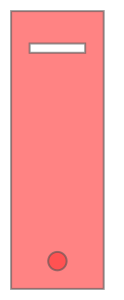

In [7]:
geomT = geomRC.translate(0,-150)
geomT

In [8]:
geomT.geometries[0].polygon.exterior.coords[:-1]

[(-50.0, -150.0), (50.0, -150.0), (50.0, 150.0), (-50.0, 150.0)]

In [9]:
geomT.point_geometries[0]._point.coords[0]

(0.0, -120.0)

Example rotation

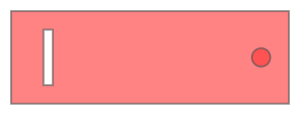

In [10]:
import numpy as np
geomR = geomT.rotate(np.pi/2)
geomR

In [11]:
geomR.geometries[0].polygon.exterior.coords[:-1]

[(150.0, -50.0), (150.0, 50.0), (-150.0, 50.0), (-150.0, -50.0)]

In [12]:
geomR.point_geometries[0]._point.coords[0]

(120.0, 0.0)

Example integration

In [13]:
from structuralcodes.sections._generic import GenericSection

sec = GenericSection(geomT, 'mySection')
sec.gross_properties

GrossProperties(area=29400.0, area_concrete=0, area_reinforcement=0, ea=0, mass=0, perimeter=0, sx=0, sy=0, cx=0, cy=0, i_yy=0, i_zz=0, i_yz=0, ei_xx=0, ei_yy=0)

100.00000000000001
100.00000000000001 128.57142857142858 150.00000000000003
[(-0.002, 0), (-0.0035, -0.002)] 2
[(577.5000000000002, -9.450000000000003, 0.036750000000000005), (-30,)] 2
POLYGON ((50 100.00000000000001, 50 128.57142857142858, -50 128.57142857142858, -50 100.00000000000001, 50 100.00000000000001), (30 105, -30 105, -30 115, 30 115, 30 105))
True
POLYGON ((50 100.00000000000001, 50 128.57142857142858, -50 128.57142857142858, -50 100.00000000000001, 50 100.00000000000001), (30 105, -30 105, -30 115, 30 115, 30 105))
POLYGON ((-50 150, -50 128.57142857142858, 50 128.57142857142858, 50 150, -50 150))
True
POLYGON ((-50 150, -50 128.57142857142858, 50 128.57142857142858, 50 150, -50 150))


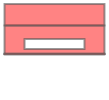

In [14]:
from structuralcodes.sections._section_integrators import MarinIntegrator

integr = MarinIntegrator()
g = integr.prepare_input(geo=sec.geometry,strain=[0.007, 7e-5, 0])
g

True
6384209.999999973 475623644.99999976 319210500.0
6384209.999999973 -482007854.99999774 -1.6443664208054543e-09


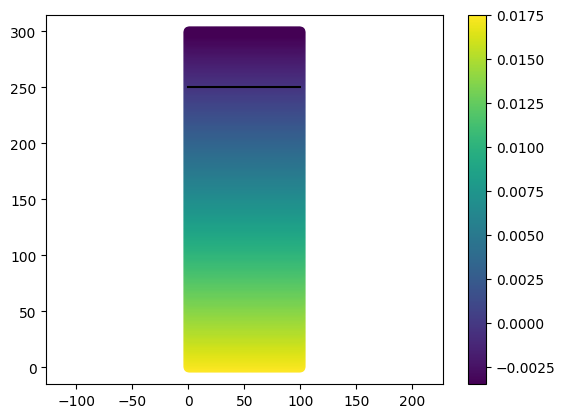

In [24]:
import numpy as np
import matplotlib.pyplot as plt
epsA = 0.007
epsA00 = 0.0175
kx = 7.0e-5
ky = 0

x = np.linspace(0,100,101)
y = np.linspace(0,300,301)
dx = (x[-1]-x[0])/(len(x)-1)
dy = (y[-1]-y[0])/(len(y)-1)

X,Y = np.meshgrid(x,y)


# strain = np.zeros_like(X)
xg = 50
yg = 150
# strain = epsA + (X-xg) * ky - (Y-yg) * kx # opt 1: epsA is in baricenter
strain = epsA00 + X * ky - Y * kx # opt 2 epsA is in 0,0 (more generic?)
# for i in range(len(x)):
#     for j in range(len(y)):
#         strain[j,i] = epsA + (X[j,i]-xg) * ky + (Y[j,i]-yg) * kx

# a + b*(x-xg) + c*(y-yg) = 0 y = (-a - b*(x-xg))/c + yg

def zero_strain(a,b,c,x):
    return -(-a - b*x)/c

y0 = zero_strain(epsA, ky, kx, (x-xg)) + yg # opt 1
y0 = zero_strain(epsA00, ky, kx, x) # opt 2
print(np.allclose(zero_strain(epsA, ky, kx, (x-xg)) + yg, zero_strain(epsA00, ky, kx, x)))
plt.scatter(X,Y,c = strain)
plt.plot(x,y0,'-k')
plt.colorbar()
plt.axis('equal')

E = 30000
sig = E * strain

N = 0
Mx, Mxg = 0, 0
My, Myg = 0, 0
for i in range(len(y)):
    for j in range(len(x)):
        N += sig[i,j] * dx * dy
        Mx += sig[i,j] * dx * dy * Y[i,j]
        My += sig[i,j] * dx * dy * X[i,j]
        Mxg += sig[i,j] * dx * dy * (Y[i,j]-yg)
        Myg += sig[i,j] * dx * dy * (X[i,j]-xg)

print(N,Mx,My)
print(N,Mxg,Myg)
